# Classifier name 

Step -1 :import datascience libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Step-2: Load Dataset**

In [40]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
X = digits.data # independent varible 
y = digits.target # dependent varible

### Feature Scaling (Normalizing )

In [7]:
X = X  / X.max()

In [8]:
X = X.astype('float32')

In [9]:
X.shape,  y.shape

((1797, 64), (1797,))

**visualize data**

In [10]:
plt.style.use('fivethirtyeight')

In [11]:
img = X[0:1]

[0]


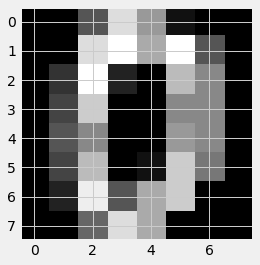

In [12]:
print(y[0:1])
plt.imshow(img.reshape((8,8)),cmap = 'gray')


** Step 4 Splitting Data into traning and testing **

In [13]:
from sklearn.cross_validation import train_test_split

C:\Users\Prince Tau\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
x_train , x_test, y_train, y_test = train_test_split(X, y,
                                                     test_size = 0.2,
                                                    random_state = 0)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

### Step 5:  Building Machine Learning classifier or model

In [16]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
model = SVC(C = 10.0,probability=True) # captial "C"


traning model

In [18]:
model.fit(x_train, y_train) # training model
sc=model.score(x_test,y_test)
sc

0.9861111111111112

**Step -6 :Evaluation model**

In [19]:
y_pred = model.predict(x_test) # we use this for evaluation
y_prob = model.predict_proba(x_test) # probability score

***classification metrics**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
cm = confusion_matrix(y_test, y_pred) # confusion matrix
cr = classification_report(y_test, y_pred) # classification report

In [22]:
import seaborn as sns

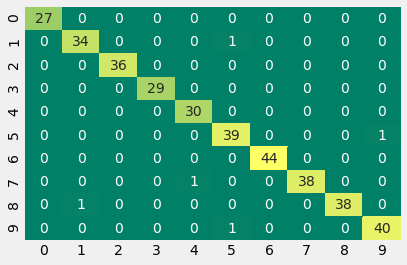

In [23]:
sns.heatmap(cm,annot=True,cbar=None,cmap = 'summer')

In [24]:
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.97      0.97      0.97        35
          2       1.00      1.00      1.00        36
          3       1.00      1.00      1.00        29
          4       0.97      1.00      0.98        30
          5       0.95      0.97      0.96        40
          6       1.00      1.00      1.00        44
          7       1.00      0.97      0.99        39
          8       1.00      0.97      0.99        39
          9       0.98      0.98      0.98        41

avg / total       0.99      0.99      0.99       360



**Saving and loading model**

In [25]:
from sklearn.externals import joblib

In [26]:
joblib.dump(model,'number_rec.pkl')

['number_rec.pkl']

In [27]:
classify = joblib.load('number_rec.pkl')

**Tesing with new image**

In [28]:
import cv2

In [29]:
img =cv2.imread('number3.jpg',0) # if you use zero it will convert into grayscale image


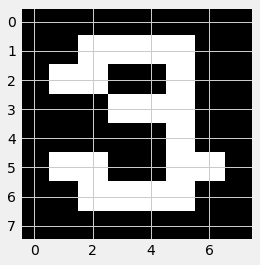

In [30]:
# 8 x 8 is  -> 1 x 64
# resizing image 
img_re = cv2.resize(img,(8,8))
ret, thresh = cv2.threshold(img_re, 127,255,cv2.THRESH_BINARY_INV) 
plt.imshow(thresh,cmap = 'gray')

#  Reshape image 

In [31]:
img_re = img_re.astype('float32')
img_re = img_re/255.0

In [32]:
img_test = img_re.reshape((1,64))

In [33]:
img_test.shape

(1, 64)

In [34]:
pred = classify.predict(img_test)
prob = classify.predict_proba(img_test)


In [35]:
print('Number predicted :', pred)
print('Probabiliy score:', prob[0][pred])

Number predicted : [4]
Probabiliy score: [0.25839595]


In [39]:
cap = cv2.VideoCapture(0)

while True:
    _,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7),3)
    _,th3 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
    #th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,7)
    im2, contours, hierarchy = cv2.findContours(th3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    ix = np.where(np.array(areas) > 300)[0]
    result = np.array([1,0,0,0,0,0,0,0,0,0])
    for i in ix:
        cnt = contours[i]
        xr,yr,wr,hr = cv2.boundingRect(cnt)
        if xr< 20 :
            xr = 25


        if yr < 20:
            yr = 25


        cv2.rectangle(img,(xr-10,yr-10),(xr+wr+10,yr+hr+10), (0,255,0),2)
        roi = th3[yr-20:yr+hr+20, xr-20:xr+wr+20]
        
        roi_re=cv2.resize(roi,(8,8))
        g = roi_re.reshape(1,64).astype('float32')
        g = g/255
        result=  model.predict(g)
        #print(result)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'Number: '+str(result),(xr-10,yr-10), font, 0.4, (255,0,0), 1, cv2.LINE_AA)


    cv2.imshow('Threshold',th3)
    cv2.imshow('orginal',img)

    if cv2.waitKey(41) & 0xff == ord('q'):
        break
        
    
    
cap.release()    
cv2.destroyAllWindows()